# Problema de la mochila


Dado un conjunto de $m$ elementos cada uno descrito por su masa $w_j$ y su valor $v_j$ y una mochila cuyo límite de capacidad es $C$. Asumiendo que el volumen y la forma de los objetos no importan, encuentre el subconjunto de objetos de mayor valor que puede ser llevado en la mochila. Este es un problema de optimización combinatorial NP completo

Podemos definir la variable indicadora

$$
x = (z_1, z_2, \ldots, z_m)
$$

donde cada $z_i \in \{0, 1\}$ es igual a 1 si el elemento $i$ está en la mochila y 0 si no lo está

Se define entonces un espacio de posibilidades

$$
\Omega = \left \{x \in {0, 1}^m : \sum_{j=1}^m w_j z_j \leq C \right \}
$$

De donde queremos encontrar aquella que maximiza la utilidad

$$
U(x) = \sum_{j=1}^m v_j z_j
$$

## Solución con Monte Carlo

Para resolverlo con Monte Carlo podríamos

- Dado $x_t$
- Escoger $j \in [1, ..., m]$ al azar de manera uniforme
- Crear $y=(z_1, z_2, ..., 1-z_j,..., z_m)$, si es la mejor solución hasta ahora, guardarla
- Si $y$ es factible entonces $x_{t+1} = y$ de lo contrario $x_{t+1} = x_t$

Pero esto podría tardar muchisimo para $m$ grande

## Actividad: Simulated Annealing

Resuelva este problema usando el algoritmo de Simulated Annealing, el cual es una versión del algoritmo de Metropolis donde la distribución de interés se formula a partir de la función de utilidad como

$$
p(x) = \frac{1}{Z} \exp \left(\frac{U(x)}{T} \right) 
$$

donde $T$ es la temperatura y $Z = \sum_{x\in \Omega}  \exp \left(\frac{U(x)}{T} \right)$ es la evidencia que no depende de $x$

- Implemente la solución de Monte Carlo con el criterio de aceptación ingenuo 
- Implemente la solución de Simulated annealing modificando el criterio de aceptación ingenuo por de Metropolis
- Para el conjunto de datos $X_3$
    - Muestre las trazas y compare SA con el método de montecarlo clásico ¿Cuánto demora cada uno en llegar a la solución óptima?
    - Explore la influencia del parámetro $T$. Muestre y compare resultados con un $T$ grande, adecuado y pequeño decididos por usted. Pruebe con un valor de $T$ adaptivo dado por
    $$
    T_i = \frac{\alpha}{\log(i)}
    $$
    donde $\alpha$ es una constante positiva seleccionada por usted (seleccione un conjunto de va
    - Muestre la mejor solución obtenida usando Montecarlo y SA (Mejor valor de $T$)

Nota: La solución óptima tiene un valor de 1458. Su resultado no necesariamente alcanzará esta solución pero acercarse.

In [1]:
X3 = {"m": 15, "C": 750,
      "v": [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240],
      "w": [70, 73, 77, 149, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118]
     }

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from random import randint
import math

**Solución monte carlo con criterio de aceptación ingenuo**

In [83]:
def vector_random():
    x= np.zeros(15)
    for i in range(np.random.randint(15)):
        x[np.random.randint(15)] = 1
    return x

def monte_carlo(X):
    pesos = 0
    valor = 0
    peso_maximo = 0
    valor_maximo = 0
    mejor_vector = np.zeros(len(X["v"]))
    resultados = []
    for i in range(10000):
        y = vector_random()
        pesos = 0
        valor = 0
        for j in range(len(X["v"])):
            valor += X["v"][j]*y[j]
            pesos += X["w"][j]*y[j]
        #print(valor)
        if(pesos < X3["C"] and valor_maximo < valor):
            peso_maximo = pesos
            valor_maximo = valor
            resultados.append(valor)
        
    print("peso máximo: ", peso_maximo)
    print("valor_máximo: ", valor_maximo)
    plt.plot(resultados)
    return;

peso máximo:  745.0
valor_máximo:  1492.0


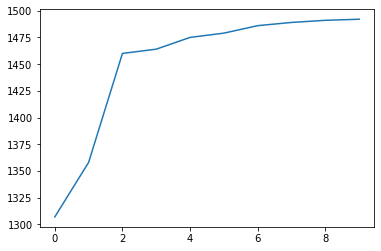

In [84]:
monte_carlo(X3)

In [43]:
T=100

In [65]:
def p(valor, valor2) : 
    return (np.exp(valor/T)/np.exp(valor2/T))

In [88]:
%%time
mix_time = 100000
us = scipy.stats.uniform.rvs(size=mix_time)
valor = 0
pesos = 0
valor2 = 0
x = np.zeros(15)
y = np.zeros(15)
resultados2 = []
for n in range(1, mix_time):
    valor = 0
    pesos = 0
    valor2 = 0
    #j = randint(0,len(X1["v"])-1)
    x = vector_random()
    for j in range(len(X3["v"])):
            valor += X3["v"][j]*x[j]
            valor2 += X3["v"][j]*y[j]
            pesos += X3["w"][j]*x[j]
    cociente = p(valor,valor2)
    #print(" valor : ", valor)
    #print(" peso para valor:", pesos)
    #print(" ------ ")
    #print(" valor2 : ", valor2)
    #print("\n")
    #print(cociente)
    if (pesos<X3["C"] and us[n] < min(1,cociente)):
        resultados2.append(valor)
        y = x.copy()
    else:
        x = vector_random()

CPU times: user 7.16 s, sys: 16.2 ms, total: 7.17 s
Wall time: 7.14 s


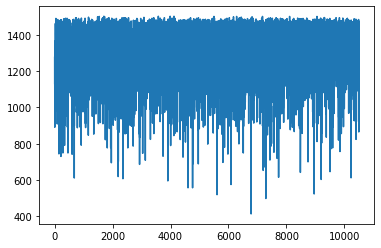

In [89]:
plt.plot(resultados2)